<a href="https://colab.research.google.com/github/KrankVegan/Nuevo-Repositorio/blob/main/Tarea_Operaciones_morfologicas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Tarea sobre Operaciones Morfológicos

Estudiante: Miguel Angel Martinez C.

Tipos de operaciones morfológicas:



*   Dilatación
*   Erosión
*   Abertura
*   Cierre




**Objetivo** = Hacer las operaciones anteriormente mencionados sin utilizar las funciones de cv2.

In [1]:
import matplotlib.pyplot as plt
import cv2 #para obtener solo la imagen
import numpy as np 
from scipy.signal import fftconvolve


In [2]:
img = (cv2.imread('./circles.png')[...,0] > 0)*255
img = img.astype(np.uint8)

Text(0.5, 1.0, 'Noisy Image')

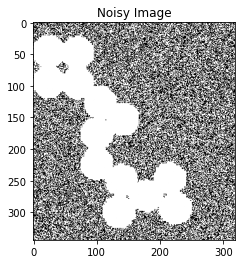

In [3]:
img_noise = img + np.random.randint(2,size=(img.shape[0],img.shape[1]),dtype=np.uint8)*255

kernel = np.ones((5,5),np.uint8) 
plt.imshow(img_noise,cmap="gray")
plt.title("Noisy Image")

Se decide en utilizar convoluciones para crear estas operaciones, utilizando la función fftconvolve de scipy.signal

In [4]:
def erosion(A,B):#la erosión se puede ver como la convolución de A y B, limitado por el umbral m>0.5, donde m es el tamaño del Kernel(5 porque se definió atrás de dimensiones 5x5)
  thresh = np.count_nonzero(B)-0.5
  return fftconvolve(A,B,'same') > thresh

def dilate(A,B):
    return fftconvolve(A,B,'same')>24#la dilatación se puede ver como la convolución de A y B, limitado a un umbral arbitrario, que en este caso se coloca en 24
  

Obtenido de: https://stackoverflow.com/questions/25034259/scipy-ndimage-morphology-operators-saturate-my-computer-memory-ram-8gb/51159444#51159444

Aplicando **Apertura**, definido como:

$A \circ  B =(A\circleddash B)\oplus B$

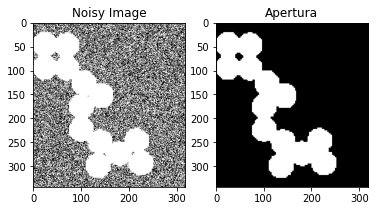

In [5]:
a = erosion(img,kernel)
img_noise_removed = dilate(a,kernel)

plt.subplot(1,2,1)
plt.title("Noisy Image")
plt.imshow(img_noise,cmap='gray')

plt.subplot(1,2,2)
plt.title("Apertura")
plt.imshow(img_noise_removed,cmap='gray')

Aplicando **Cierre**, definido como:

$A \bullet B =(A\oplus B)\circleddash B $

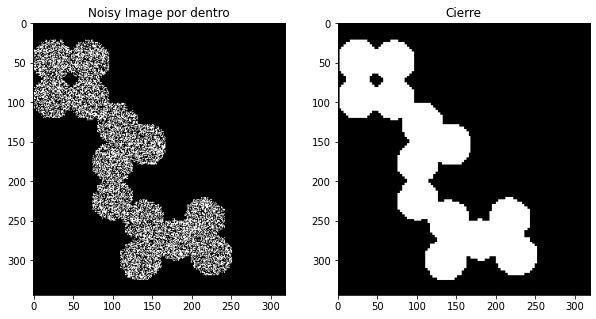

In [6]:
img_hole = img - np.random.randint(2,size=(img.shape[0],img.shape[1]),dtype=np.uint8)*255

a = dilate(img,kernel)
img_hole_removed  = erosion(a,kernel)

plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.title("Noisy Image por dentro")
plt.imshow(img_hole,cmap='gray')

plt.subplot(1,2,2)
plt.title("Cierre")
plt.imshow(img_hole_removed,cmap='gray')

Extracción de Bordes, definido como:

$A_b =A - A\circleddash B $

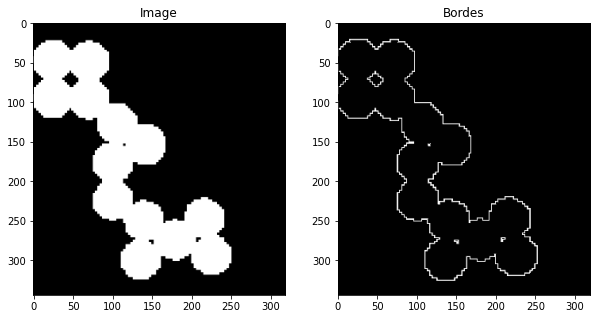

In [7]:
img = cv2.imread('./circles.png')
img = img[...,0]


kernel = np.ones((3,3),np.uint8)

erode_image = erosion(img,kernel)

plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.title("Image")
plt.imshow(img,cmap='gray')

plt.subplot(1,2,2)
plt.title("Bordes")
plt.imshow(-img-img-erode_image,cmap='gray')